<a href="https://colab.research.google.com/github/yatta03/PunLocation/blob/master/pun_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## data info  
data len: total / hetero / homo  
total: 4030: 1780 + 2250  
train: 2901: 1281 + 1620  
val: 726: 321 + 405  
test: 403: 178 + 225  

## result

CV classification [4030] instances  
Precision 91.414	Recall 92.113	F1 91.762	Acc 88.189  
CV location [2878] pun instances  
Precision 84.119	Recall 77.484	F1 80.666	Acc 77.484  

In [19]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
log_file = "./all.log"

In [3]:
train_pattern = r"Epoch: \[(\d+)\]\[\d+\/\d*\].*VB Loss ([\d.]+).*F1 ([\d.]+)"
val_pattern = r"Validation:.*F1 Score ([\d.]+).*?\n\n.*?\* LOSS - ([\d.]+), F1 SCORE - ([\d.]+)"
test_pattern = r"pred\s+tensor\([\s\S]*?\)\s+gold\s+tensor\([\s\S]*?\)\s+\* LOSS - ([\d\.]+), F1 SCORE - ([\d\.]+)"
fold_pattern = r"Working on (\d+) fold"

In [51]:
logs = {"fold": [], "epoch": [], "phase": [], "loss": [], "f1": []}

with open(log_file, "r") as f:
  log_content = f.read()

folds = re.split(fold_pattern, log_content)
for i in range(1, len(folds), 2):
  f_num = folds[i]
  data = folds[i+1]
  # train
  train = re.findall(train_pattern, data)
  for t in train:
    logs["fold"].append(int(f_num))
    logs["epoch"].append(int(t[0]))
    logs["phase"].append("train")
    logs["loss"].append(float(t[1]))
    logs["f1"].append(float(t[2]))
  # validation
  val = re.findall(val_pattern, data)
  for inx, v in enumerate(val):
    logs["fold"].append(int(f_num))
    logs["epoch"].append(inx)
    logs["phase"].append("validation")
    logs["loss"].append(float(v[1]))
    logs["f1"].append(float(v[2]))
  # test
  test = re.findall(test_pattern, data)
  for t in test:
    logs["fold"].append(int(f_num))
    logs["epoch"].append(-1)
    logs["phase"].append("test")
    logs["loss"].append(float(t[0]))
    logs["f1"].append(float(t[1]))

df = pd.DataFrame(logs)

In [ ]:
train_data = df[df["phase"] == "train"]
val_data = df[df["phase"] == "validation"]
test_data = df[df["phase"] == "test"]

     fold  epoch       phase   loss      f1
150     0      0  validation  2.203  60.498
151     0      1  validation  1.519  82.169
152     0      2  validation  1.176  83.223
153     0      3  validation  1.838  83.706
154     0      4  validation  1.203  79.112


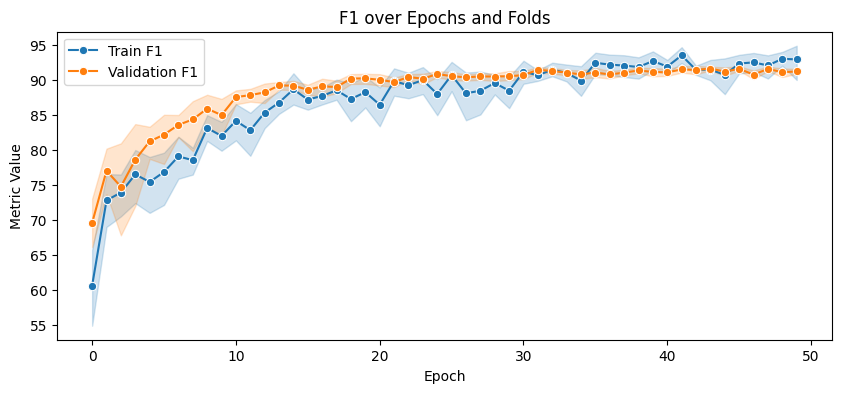

In [69]:
print(val_data.head())
plt.figure(figsize=(10, 4))
sns.lineplot(data=train_data, x="epoch", y="f1", label="Train F1", marker="o")
sns.lineplot(data=val_data, x="epoch", y="f1", label="Validation F1", marker="o")

plt.title("F1 over Epochs and Folds")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
# plt.grid()
plt.show()

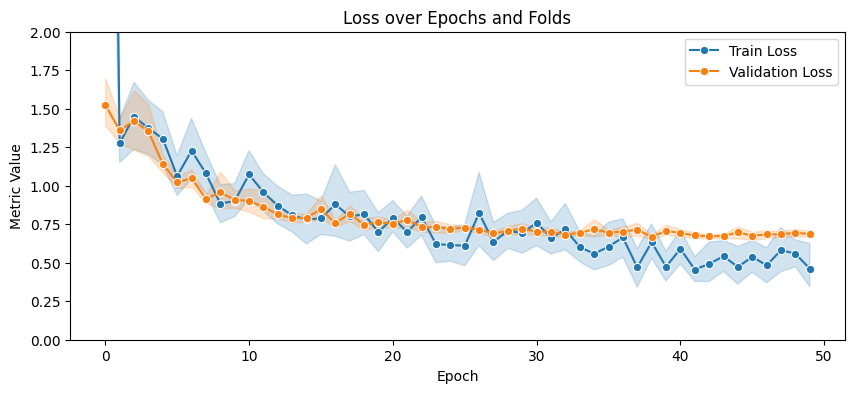

In [70]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=train_data, x="epoch", y="loss", label="Train Loss", marker="o")
sns.lineplot(data=val_data, x="epoch", y="loss", label="Validation Loss", marker="o")
plt.title("Loss over Epochs and Folds")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.ylim(0, 2)
plt.legend()
plt.show()

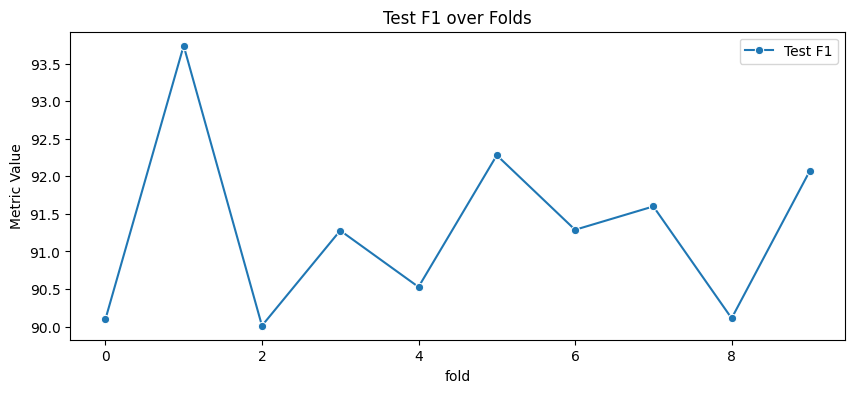

In [67]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=test_data, x="fold", y="f1", label="Test F1", marker="o")
plt.title("Test F1 over Folds")
plt.xlabel("fold")
plt.ylabel("Metric Value")
plt.legend()
plt.show()